# Πρώτο μέρος

In [9]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, f1_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Downloading the Dataset

# Loading the Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Exploring the Data
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())




Training Data:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scree

In [10]:

# Checking for Missing Values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())




Missing Values in Training Data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing Values in Testing Data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [11]:

# Preprocessing the Data
# Assuming no missing values, we proceed to normalize the features.
# Note: The 'price_range' column in the training data is the target variable and should not be normalized.

features_train = train_data.drop('price_range', axis=1)
features_test = test_data.drop('id', axis=1)  # Assuming 'id' is not a feature

scaler = preprocessing.StandardScaler()

# Fit on training set only.
scaler.fit(features_train)

# Apply transform to both the training set and the test set.
train_scaled = scaler.transform(features_train)
test_scaled = scaler.transform(features_test)

# Convert back to DataFrame for convenience
train_scaled = pd.DataFrame(train_scaled, columns=features_train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=features_test.columns)

print("\nScaled Training Data:")
print(train_scaled.head())
print("\nScaled Testing Data:")
print(test_scaled.head())


Scaled Training Data:
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_scr

In [12]:
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

# Function to calculate purity
def purity_score(y_true, y_pred):
    # compute confusion matrix
    confusion_matrix_ = confusion_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix_, axis=0)) / np.sum(confusion_matrix_) 

# Function to calculate F1 score
def f1_score_func(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')


In [13]:
# Split the original training data into a new training set and a validation set
train_scaled, val_scaled, train_labels, val_labels = train_test_split(train_scaled, train_data['price_range'], test_size=0.2, random_state=42)

# Define the range of K
K_values = [2, 4, 6, 8, 10]

# Store the results
results = []

# Loop over K values
for K in K_values:
    purity_scores = []
    f1_scores = []
    for _ in range(10):  # 10 executions
        # Initialize KMeans
        kmeans = KMeans(n_clusters=K, random_state=None)

        # Fit on training data
        kmeans.fit(train_scaled)

        # Predict on validation data
        y_pred = kmeans.predict(val_scaled)

        # Calculate purity and F1 score
        purity = purity_score(val_labels, y_pred)
        f1 = f1_score_func(val_labels, y_pred)

        # Store the scores
        purity_scores.append(purity)
        f1_scores.append(f1)

    # Calculate average scores
    avg_purity = np.mean(purity_scores)
    avg_f1 = np.mean(f1_scores)

    # Store the results
    results.append((K, avg_purity, avg_f1))

# Print the results
for K, purity, f1 in results:
    print(f"K={K}, Average Purity={purity:.3f}, Average F1 Score={f1:.3f}")




K=2, Average Purity=0.280, Average F1 Score=0.164
K=4, Average Purity=0.300, Average F1 Score=0.244
K=6, Average Purity=0.349, Average F1 Score=0.130
K=8, Average Purity=0.355, Average F1 Score=0.078
K=10, Average Purity=0.366, Average F1 Score=0.061


In [19]:
# Store the results
results_agglo = []

# Loop over K values
for K in K_values:
    # Initialize scores list
    purity_scores_agglo = []
    f1_scores_agglo = []

    for _ in range(10):  # run the method 10 times
        # Initialize AgglomerativeClustering
        agglomerative = AgglomerativeClustering(n_clusters=K, linkage='ward')

        # Fit on training data
        agglomerative.fit(train_scaled)

        # Predict on validation data
        # Note: AgglomerativeClustering does not have a 'predict' method, so we fit_predict on the validation data
        y_pred_agglo = agglomerative.fit_predict(val_scaled)

        # Calculate purity and F1 score
        purity_agglo = purity_score(val_labels, y_pred_agglo)
        f1_agglo = f1_score_func(val_labels, y_pred_agglo)

        # Store the scores
        purity_scores_agglo.append(purity_agglo)
        f1_scores_agglo.append(f1_agglo)

    # Compute average purity and F1 score
    avg_purity_agglo = np.mean(purity_scores_agglo)
    avg_f1_agglo = np.mean(f1_scores_agglo)

    # Store the average results
    results_agglo.append((K, avg_purity_agglo, avg_f1_agglo))

# Print the results
for K, purity, f1 in results_agglo:
    print(f"K={K}, Average Purity={purity:.3f}, Average F1 Score={f1:.3f}")


K=2, Average Purity=0.287, Average F1 Score=0.165
K=4, Average Purity=0.368, Average F1 Score=0.305
K=6, Average Purity=0.382, Average F1 Score=0.146
K=8, Average Purity=0.403, Average F1 Score=0.097
K=10, Average Purity=0.415, Average F1 Score=0.064


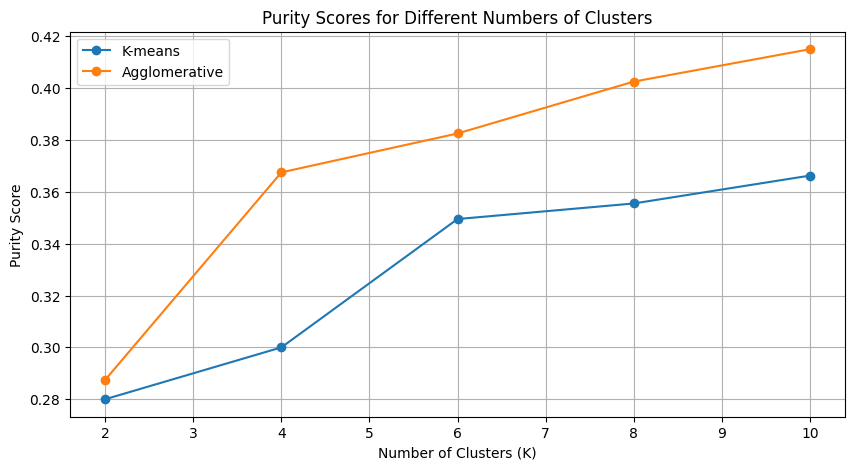

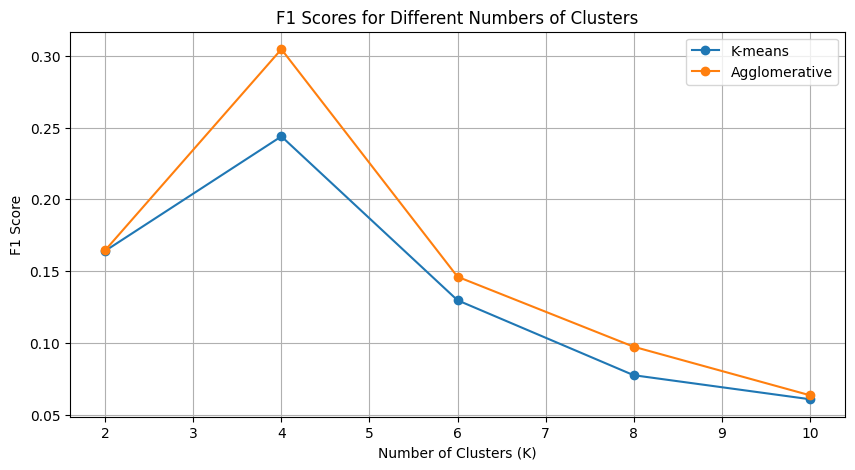

In [20]:
import matplotlib.pyplot as plt

# Extract scores
k_values = [2, 4, 6, 8, 10]
purity_kmeans = [result[1] for result in results]
f1_kmeans = [result[2] for result in results]
purity_agglo = [result[1] for result in results_agglo]
f1_agglo = [result[2] for result in results_agglo]

# Plot purity scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, purity_kmeans, label='K-means', marker='o')
plt.plot(k_values, purity_agglo, label='Agglomerative', marker='o')
plt.title('Purity Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Purity Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_kmeans, label='K-means', marker='o')
plt.plot(k_values, f1_agglo, label='Agglomerative', marker='o')
plt.title('F1 Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


# Δεύτερο μέρος

Epoch 1/50
7/7 [==============================] - 1s 39ms/step - loss: 0.6772 - val_loss: 0.6584
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6398 - val_loss: 0.6117
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5811 - val_loss: 0.5409
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4963 - val_loss: 0.4427
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3843 - val_loss: 0.3192
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.2499 - val_loss: 0.1791
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.1011 - val_loss: 0.0341
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: -0.0480 - val_loss: -0.1123
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: -0.2058 - val_loss: -0.2670
Epoch 10/50
7/7 [==============================] - 0s 9ms/step - loss: -0.3813 - val_loss: -0.4481
Epoch 11/50
7/7 [===========

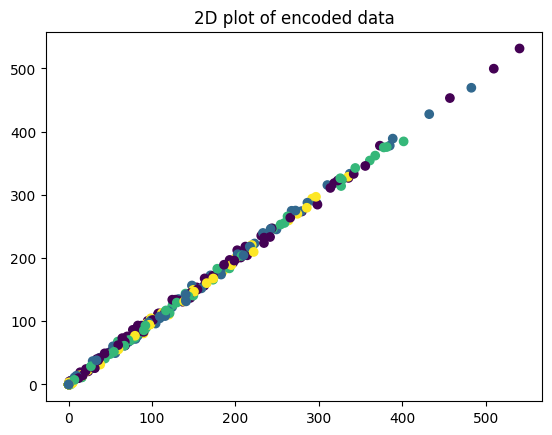

Epoch 1/50
7/7 [==============================] - 1s 32ms/step - loss: 0.6680 - val_loss: 0.6338
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6071 - val_loss: 0.5629
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5262 - val_loss: 0.4658
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.4163 - val_loss: 0.3377
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2732 - val_loss: 0.1830
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.1052 - val_loss: 0.0113
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: -0.0752 - val_loss: -0.1718
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: -0.2746 - val_loss: -0.3828
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: -0.5210 - val_loss: -0.6542
Epoch 10/50
7/7 [==============================] - 0s 7ms/step - loss: -0.8398 - val_loss: -1.0366
Epoch 11/50
7/7 [=============

7/7 [==============================] - 0s 9ms/step - loss: -812.3510 - val_loss: -859.1384
Epoch 25/50
7/7 [==============================] - 0s 10ms/step - loss: -1064.8550 - val_loss: -1103.9404
Epoch 26/50
7/7 [==============================] - 0s 8ms/step - loss: -1359.2074 - val_loss: -1405.8091
Epoch 27/50
7/7 [==============================] - 0s 10ms/step - loss: -1716.6122 - val_loss: -1764.2722
Epoch 28/50
7/7 [==============================] - 0s 10ms/step - loss: -2148.6548 - val_loss: -2188.1492
Epoch 29/50
7/7 [==============================] - 0s 8ms/step - loss: -2664.9319 - val_loss: -2688.9341
Epoch 30/50
7/7 [==============================] - 0s 8ms/step - loss: -3251.4807 - val_loss: -3280.1843
Epoch 31/50
7/7 [==============================] - 0s 8ms/step - loss: -3963.5210 - val_loss: -3951.7195
Epoch 32/50
7/7 [==============================] - 0s 8ms/step - loss: -4755.2529 - val_loss: -4726.2852
Epoch 33/50
7/7 [==============================] - 0s 9ms/step - l

In [18]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# Define the dimensions of the autoencoder
input_dim = train_scaled.shape[1]  # 20
encoding_dim = 100
hidden_dim = [2, 10, 50]  # M values

# Loop over M values
for M in hidden_dim:
    # Define the encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(M, activation='relu')(encoded)

    # Define the decoder
    decoded = Dense(encoding_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Define the autoencoder model
    autoencoder = Model(input_layer, decoded)

    # Compile the autoencoder
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the autoencoder
    autoencoder.fit(train_scaled, train_scaled,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(val_scaled, val_scaled))

    # Define the encoder model
    encoder = Model(input_layer, encoded)

    # Transform the data
    train_encoded = encoder.predict(train_scaled)
    val_encoded = encoder.predict(val_scaled)

    # Repeat the clustering process with the transformed data
    for K in K_values:
        purity_scores_kmeans = []
        f1_scores_kmeans = []
        purity_scores_agglo = []
        f1_scores_agglo = []
        for _ in range(10):  # 10 executions
            # Initialize KMeans
            kmeans = KMeans(n_clusters=K, random_state=None)

            # Fit on training data
            kmeans.fit(train_encoded)

            # Predict on validation data
            y_pred_kmeans = kmeans.predict(val_encoded)

            # Calculate purity and F1 score
            purity_kmeans = purity_score(val_labels, y_pred_kmeans)
            f1_kmeans = f1_score_func(val_labels, y_pred_kmeans)

            # Store the scores
            purity_scores_kmeans.append(purity_kmeans)
            f1_scores_kmeans.append(f1_kmeans)

            # Initialize AgglomerativeClustering
            agglomerative = AgglomerativeClustering(n_clusters=K, linkage='ward')

            # Fit and predict on validation data
            y_pred_agglo = agglomerative.fit_predict(val_encoded)

            # Calculate purity and F1 score
            purity_agglo = purity_score(val_labels, y_pred_agglo)
            f1_agglo = f1_score_func(val_labels, y_pred_agglo)

            # Store the scores
            purity_scores_agglo.append(purity_agglo)
            f1_scores_agglo.append(f1_agglo)

        # Calculate average scores
        avg_purity_kmeans = np.mean(purity_scores_kmeans)
        avg_f1_kmeans = np.mean(f1_scores_kmeans)
        avg_purity_agglo = np.mean(purity_scores_agglo)
        avg_f1_agglo = np.mean(f1_scores_agglo)

        # Print the results
        print(f"\nM={M}, K={K}")
        print(f"K-means: Average Purity={avg_purity_kmeans:.3f}, Average F1 Score={avg_f1_kmeans:.3f}")
        print(f"Agglomerative Hierarchical Clustering: Purity={avg_purity_agglo:.3f}, F1 Score={avg_f1_agglo:.3f}")

    # When M=2, create a scatter plot of the data in the 2-dimensional space
    if M == 2:
        plt.scatter(val_encoded[:, 0], val_encoded[:, 1], c=val_labels)
        plt.title('2D plot of encoded data')
        plt.show()

